In [2]:
import math
import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# <a id='0'>Highlights
- <a href='#ma'> Annotation and Drawing on a plot
- <a href='#sw'> Detecting outliers using Boxplot
- <a href='#ss'> Scatter plot with regression line
- <a href='#sr'> Conditioned Scatter plot: Relational plot

# Content
Matplotlib is good for understanding the basic elements of plots in Python, such as subplots, axes, labels, and legends etc. We will then move on to more powerful libraries like Pandas and Seaborn, which both support DataFrames and various statistical analyses.
- <a href='#m'> Matplotlib
- <a href='#p'> Pandas 
- <a href='#s'> Seaborn

## A Brief matplotlib API Primer

### Figures and Subplots

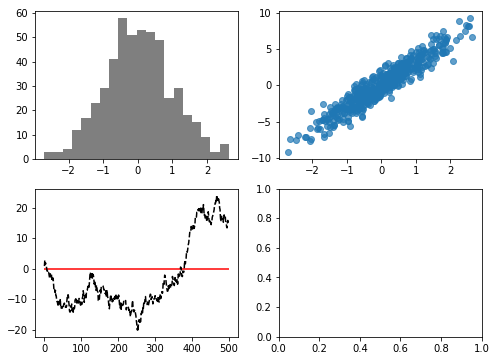

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))

N=500
x = np.random.randn(N)
y = 3*x + np.random.randn(N)
np.random.seed(42)

axes[0,0].hist(x, bins=20, color='k', alpha=0.5)
axes[0,1].scatter(x, y, alpha=0.7)
axes[1,0].plot(x.cumsum(), 'k--');
axes[1,0].hlines(0, 0, N, color='r');  # hlines(y, xmin, xmax)

#### Share x-axis or y-axis for subplots

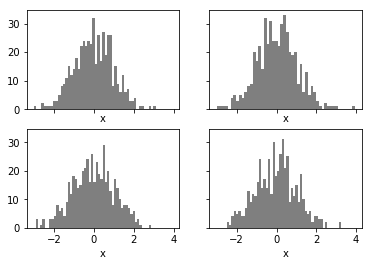

In [6]:
figs, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        axes[i, j].set_xlabel('x')

### Plot Decorations: Colors, Markers, and Line Styles

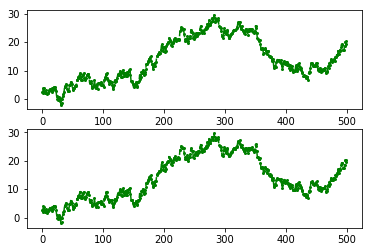

In [16]:
x = np.random.randn(N)
_, axes = plt.subplots(2,1)
axes[0].plot(x.cumsum(), color='g', markersize=2, marker='o',  linestyle='dashed');
axes[1].plot(x.cumsum(), 'go--',    markersize=2); # easier but more implicit

### Ticks, Labels, Title, and Legend

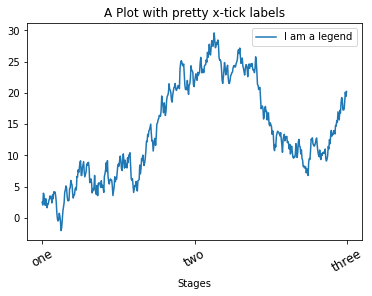

In [31]:
_, ax = plt.subplots(1,1)

ax.plot(x.cumsum(), label='I am a legend')

ticks  = ax.set_xticks([0, 250, 500])
labels = ax.set_xticklabels(['one', 'two', 'three'],
                              rotation=30, fontsize='large')
ax.set_title('A Plot with pretty x-tick labels')
ax.set_xlabel('Stages')
ax.legend(loc='best')

plt.savefig('figpath.png', dpi=200, bbox_inches='tight')

In [ ]:
# Put your favorite setup into a dictionary
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

### <a id='ma'> Annotations and Drawing on a plot
- <a href='#0'> Back to TOC

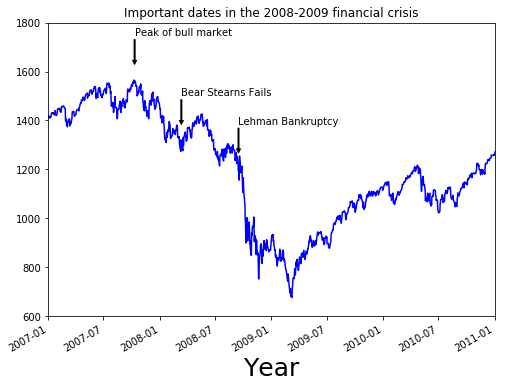

In [49]:
from datetime import datetime
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)

# Series with date index
spx = data['SPX']

# plotting with Pandas
spx.plot(style='b-', figsize=(8,6));

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12),  'Bear Stearns Fails'),
    (datetime(2008, 9, 15),  'Lehman Bankruptcy')
]

for date, label in crisis_data:    
    plt.annotate(label,
                xy     = (date, spx[date] + 75),
                xytext = (date, spx[date] + 225),
                arrowprops = dict(facecolor='black', headwidth=4, width=1, headlength=4),
                horizontalalignment='left', verticalalignment='top'
    );
    
plt.xlabel('Year', fontsize=25)
plt.xlim(['1/1/2007', '1/1/2011'])
plt.ylim([600, 1800])
plt.title('Important dates in the 2008-2009 financial crisis')
plt.xticks(fontsize=10);

### Saving Plots to File

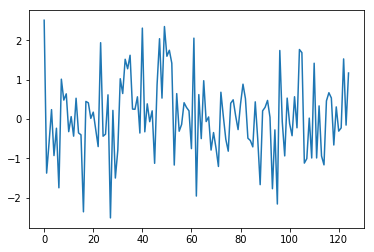

In [35]:
plt.plot(x[::4])
plt.savefig('figpath.png', dpi=200, bbox_inches='tight')

### matplotlib Configuration

In [ ]:
plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## <a id='p'> Plotting with Pandas</a>
Pandas' true strength lies in the mass operation of plotting multiple features all at once conveniently, and utilizing the row and column labels for the plot.

<a href='#0'> Back to TOC </a>

### Line Plots
Great for showing trends.

In [34]:
# DataFrame
np.random.seed(0)
df = pd.DataFrame(np.random.randn(10, 3).cumsum(0),
                  columns=['A', 'B', 'C'],
                  index=np.arange(0, 100, 10))
df.head(3)

,A,B,C
0,1.764052,0.400157,0.978738
10,4.004946,2.267715,0.001460
20,4.955034,2.116358,-0.101759


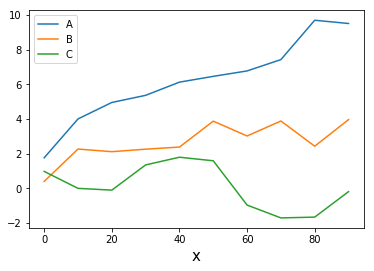

In [35]:
df.plot()
plt.xlabel('x', fontsize=15);

### Bar Plots
Suitable for categorical index that lacks order.

In [39]:
df = pd.DataFrame(np.random.rand(6, 3),
                  index=['a', 'b', 'c', 'd', 'e', 'f'],
                  columns=pd.Index(['A', 'B', 'C'], name='Genus')  # name the columns
                 )
df.head(3)

Genus,A,B,C
a,0.943748,0.681820,0.359508
b,0.437032,0.697631,0.060225
c,0.666767,0.670638,0.210383


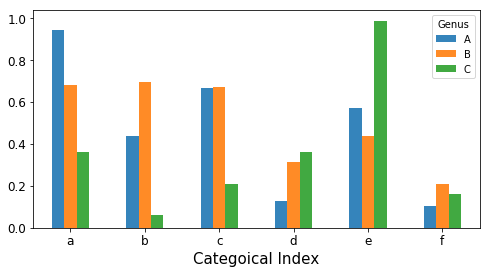

In [56]:
df.plot.bar(figsize=(8,4), 
            alpha=0.9, 
            rot=0, 
            fontsize=12)

plt.xlabel('Categoical Index', fontsize=15);

When the sum of the row is important to show

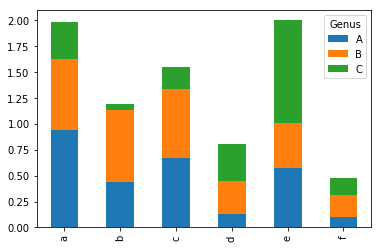

In [53]:
df.plot.bar(stacked=True);

## <a id='s'> Plotting with Seaborn
It supports mass operations on DataFrames just like Pandas, and it also supports a lot more popular statistical analyses.

### <a id='sw'> Detecting Outliers with Boxplot
Boxplot is superior for detecting outliers than Barplot in the example below.
    
<a href='#0'> Back to TOC    

#### Average Tip Percentage for each Weekday

In [106]:
tips = sns.load_dataset("tips")

# calculate tip percentage
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587


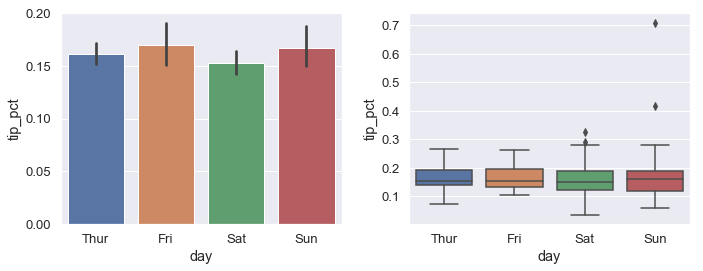

In [107]:
_, axes = plt.subplots(1,2, figsize=(10,4))  # use Matplotlib's plt API to generate a 1*2 subplots

sns.barplot(y='tip_pct', x='day', data=tips, ax=axes[0]) # Average tip_pct and its 95% Confidence Interval (CI)
sns.boxplot(y='tip_pct', x='day', data=tips, ax=axes[1])

sns.set(font_scale=1.2)
plt.tight_layout();  # separate plots far enough to ensure proper display of labels

By default, Seabonr barplot uses 95% confidence interval of the mean to plot the error bars. It's robust towards outliers, which also means it's not great for exposing outliers. I recommend Boxplot for this purpose.

#### Seaborn barplot vs Pandas groupby
We can make a similar bar plot as above (without CI from Bootstraping) using Pandas Groupby function and its bar plot.

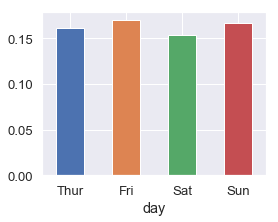

In [108]:
tips.groupby('day')['tip_pct'].mean().plot.bar(figsize=(4,3), rot=0);

#### Multi-variate boxplot: adding one more categorical variable

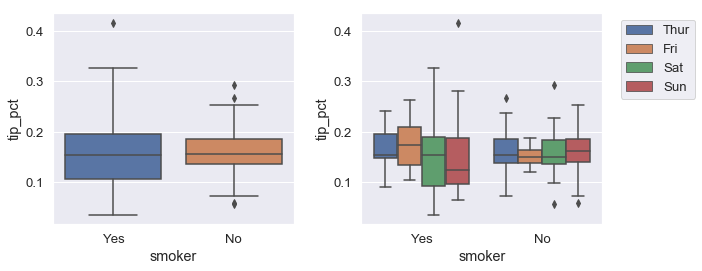

In [109]:
tips_no_outlier = tips.loc[ tips['tip_pct']<0.5 ]

_, axes = plt.subplots(1,2, figsize=(10,4))  # use Matplotlib's plt API to generate a 1*2 subplots

sns.boxplot(y='tip_pct', x='smoker',            data=tips_no_outlier, ax=axes[0])
sns.boxplot(y='tip_pct', x='smoker', hue='day', data=tips_no_outlier, ax=axes[1])

# Put the legend out of the figure
axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=.5)

sns.set(font_scale=1.2)
plt.tight_layout();  # seperate plots far enough to ensure proper display of labels

By adding the 'day' variable, we observe that smokers on average tips differently on different day.

### Histograms and KDE estimate
Matplotlib and Pandas do not have good support for kde estimation, so our best bet is using Seaborn.

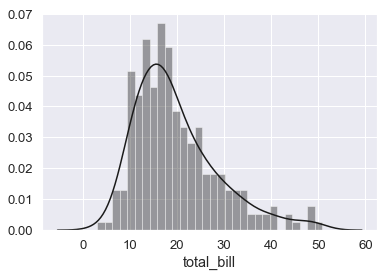

In [112]:
sns.distplot(tips['total_bill'], bins=30, color='k', kde=True);

### <a id='ss'> Scatter Plot with the Regression line
Q. Do people tip less when they have more company? Or simply because the bill is larger?

<a href='#0'> Back to TOC

In [120]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587


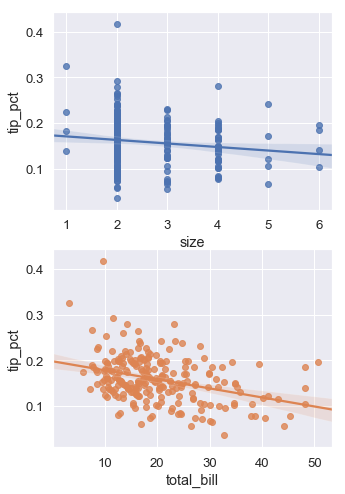

In [121]:
_, axes = plt.subplots(2,1, sharey=True, figsize=(5,8))

sns.regplot(x='size',       y='tip_pct', data=tips_no_outlier, ax=axes[0]);
sns.regplot(x='total_bill', y='tip_pct', data=tips_no_outlier, ax=axes[1]);

It does seem like the average tip_pct goes down when party size increases, but we observe the similar trend when total_bill increases. Let's choose a range of total_bill between 20 and 30, and plot again.

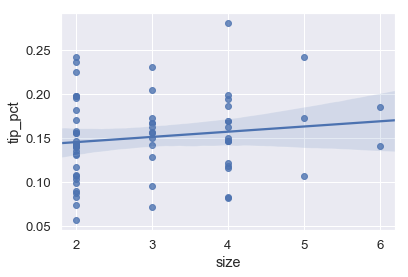

In [122]:
tips_bill_20_30 = tips.loc[ (tips.total_bill >= 20) & (tips.total_bill < 30) ]
sns.regplot(x='size', y='tip_pct', data=tips_bill_20_30);

Well, people tend to tip a bit more in groups when the total_bill is similar (each individual is paying less). This makes more sense because it's consistent with the idea that people tip more when the bill is smaller.

### Multi-variate analysis
#### Facet Grids

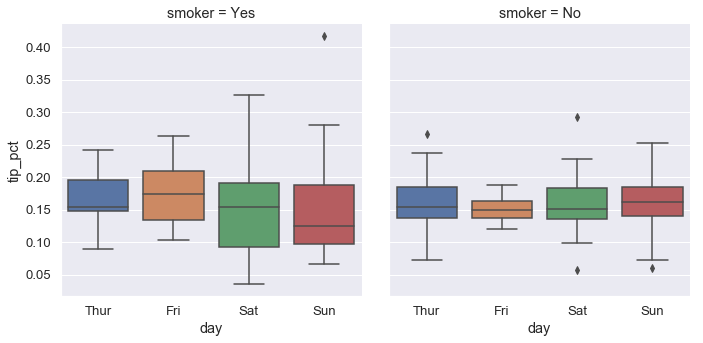

In [125]:
sns.factorplot(x='day', y='tip_pct',  col='smoker',
               kind='box', data=tips[tips['tip_pct'] < 0.5]);

It looks fancy. But we can achieve the same (if not better) using Boxplot mentioned above.

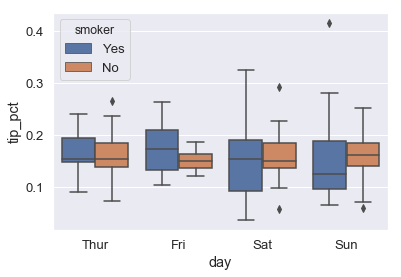

In [126]:
sns.boxplot(x='day', y='tip_pct', hue='smoker', data=tips_no_outlier);

#### <a id='sr'>Relational plot

Conditioned Scatter plot that covers 3 variables. <br>
Explore the Flight Data: July and August are the HOT season for traveling!

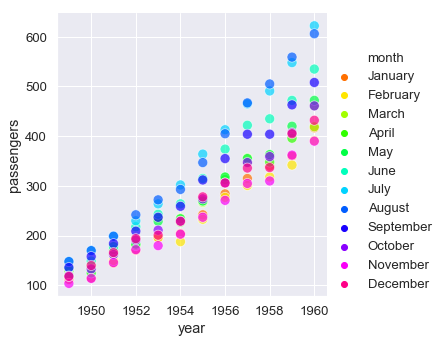

In [128]:
df = sns.load_dataset('flights')

sns.relplot(x='year', y='passengers', hue='month', data=df, palette='hsv', alpha=0.7, s=100);
sns.set(font_scale=1)

<a href='#0'> Back to TOC